## 1. Introdution to Exploratory Data Analysis

#### __Value of Exploratory Data Analysis__ 
Exploratory Data Analysis is one of the most important component of data science experiment that doesn’t get as much importance as it should.
It is good practice to understand the problem statement and the data before you get your hands dirty, which in view, helps to gain a lot of insights.

__Importing Packages__

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# allow plots to appear directly in the notebook
%matplotlib inline

c:\users\ngampala\.conda\envs\hafele\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


__Importing the Dataset__

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/naveengampala/AI/master/100Days-Of-MachineLearning/data/winequality-red.csv', index_col=0)
data.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


What are the **features**?
- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free Sulfur Dioxide
- Total Sulfur Dioxide
- Density
- pH
- Sulphates
- Alcohol

What is the **response**?
- Quality: How quality of the wine?

## 2. Exploratory Data Analysis

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599.0,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000


There are 1599 **observations**

__Distribution of Features__

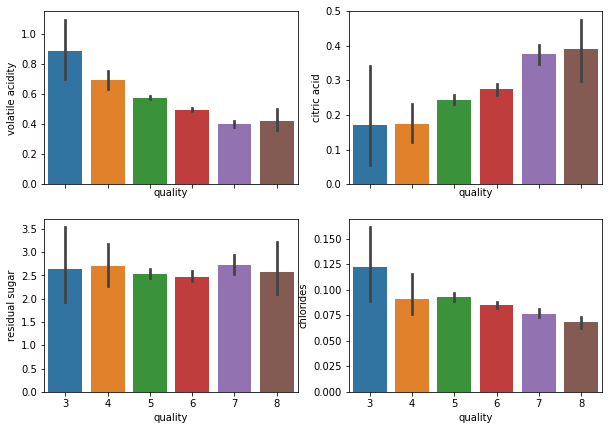

In [4]:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)                                      # Set up the matplotlib figure

sns.barplot(x = 'quality', y = 'volatile acidity', data = data, ax=axes[0, 0])
sns.barplot(x = 'quality', y = 'citric acid', data = data, ax=axes[0, 1])
sns.barplot(x = 'quality', y = 'residual sugar', data = data, ax=axes[1, 0])
sns.barplot(x = 'quality', y = 'chlorides', data = data, ax=axes[1, 1])

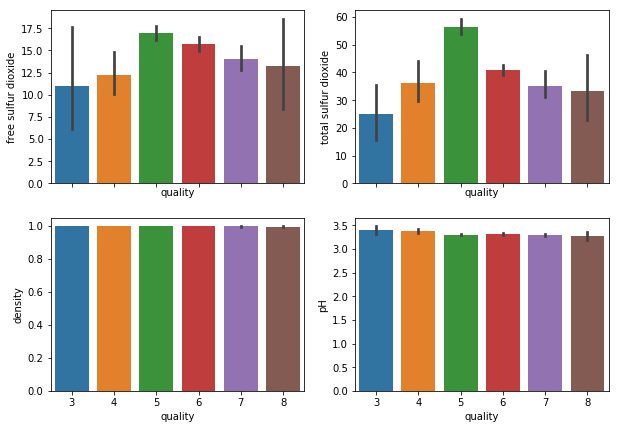

In [5]:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)                                      # Set up the matplotlib figure

sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data, ax=axes[0, 0])
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data, ax=axes[0, 1])
sns.barplot(x = 'quality', y = 'density', data = data, ax=axes[1, 0])
sns.barplot(x = 'quality', y = 'pH', data = data, ax=axes[1, 1])

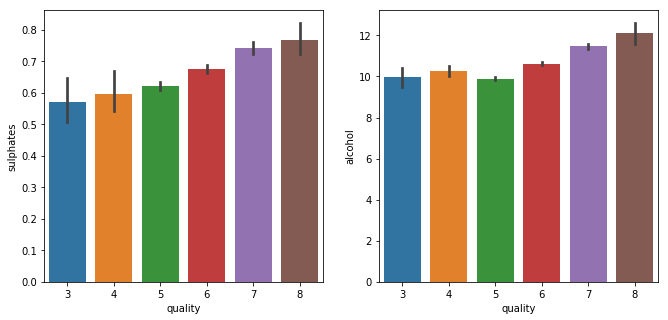

In [6]:
f, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=True)                                      # Set up the matplotlib figure

sns.barplot(x = 'quality', y = 'sulphates', data = data, ax=axes[0])
sns.barplot(x = 'quality', y = 'alcohol', data = data, ax=axes[1])


c:\users\ngampala\.conda\envs\hafele\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


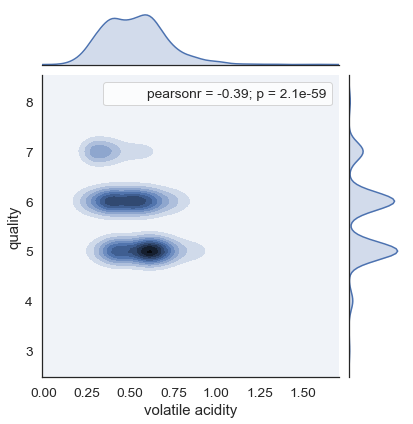

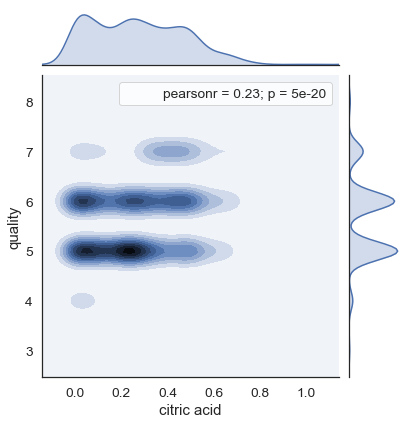

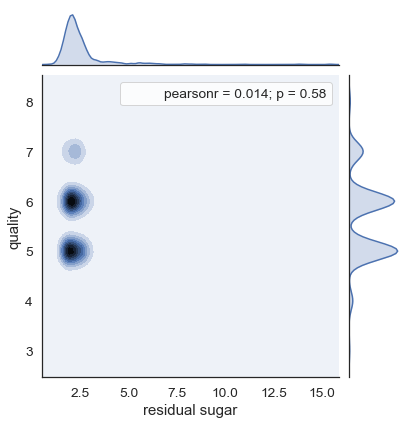

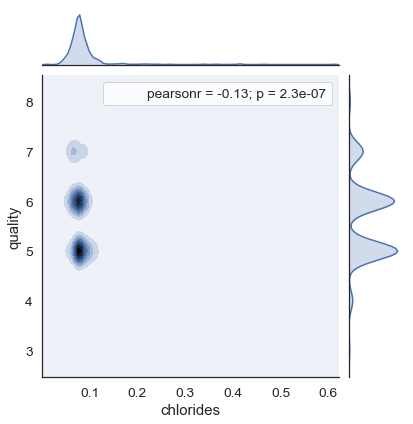

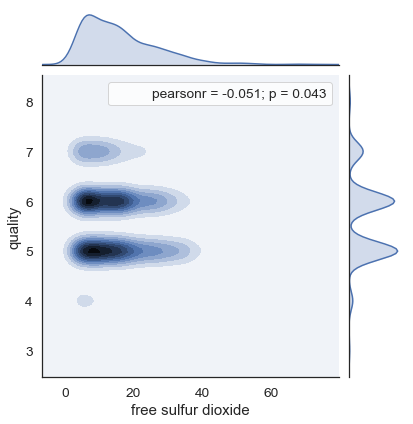

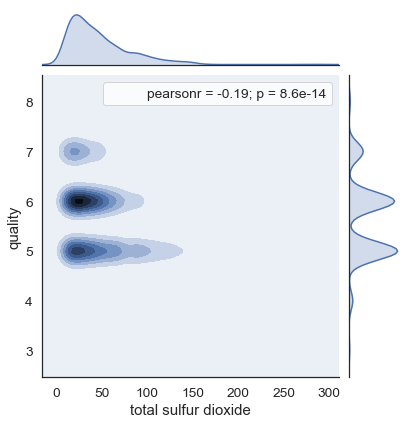

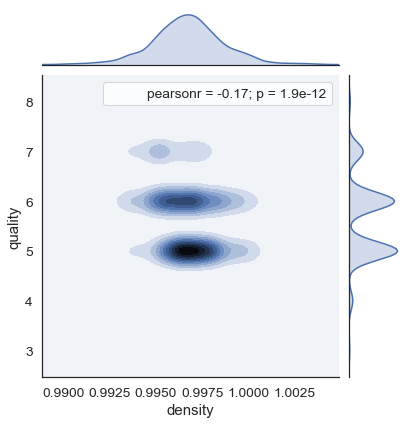

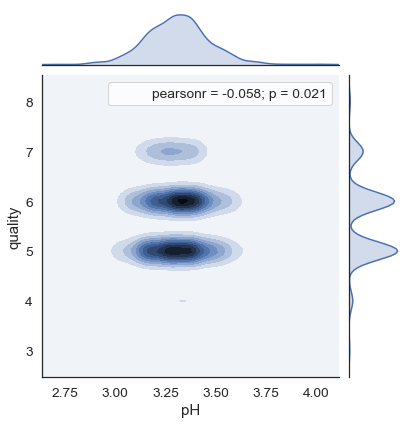

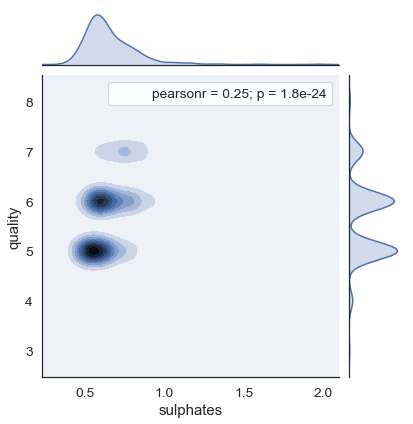

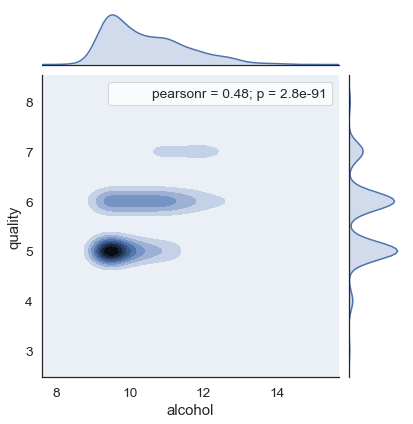

In [109]:
for feature in data.columns:
    if feature == 'quality':
        continue
    sns.jointplot(x=feature, y='quality', data=data, kind='kde', stat_func=stats.pearsonr)
    plt.show()

__Observation__<br/>
- Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases. /n
- I am leaving to you which to find which features are highly correlated.

### Visualising Pairwise correlation

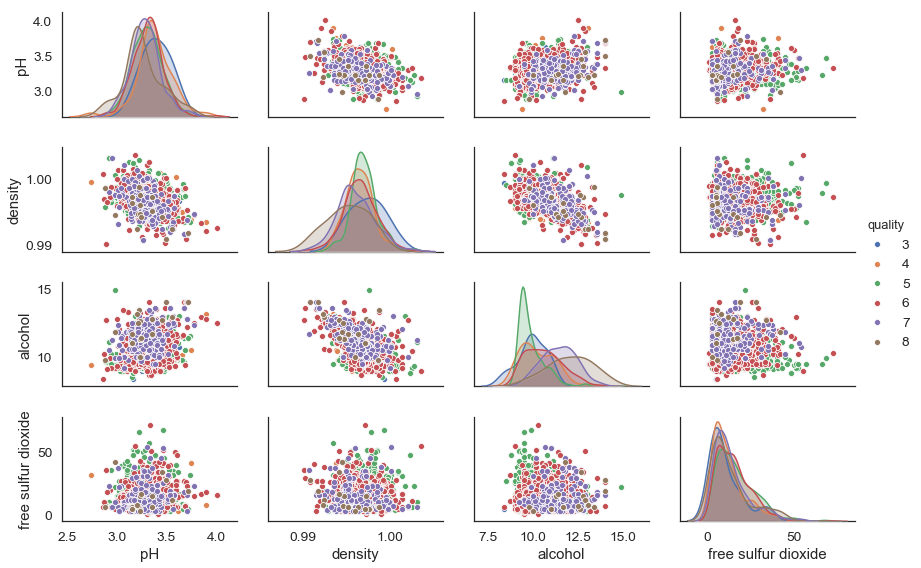

In [111]:
sns.pairplot(data, vars=["pH", "density", "alcohol", "free sulfur dioxide"], hue="quality", height = 2, aspect = 1.5)

__Observation__<br/>
- pH and density are looking same with respective of the Quality of wine look at Diagonal graphs. But alcohol is varying.

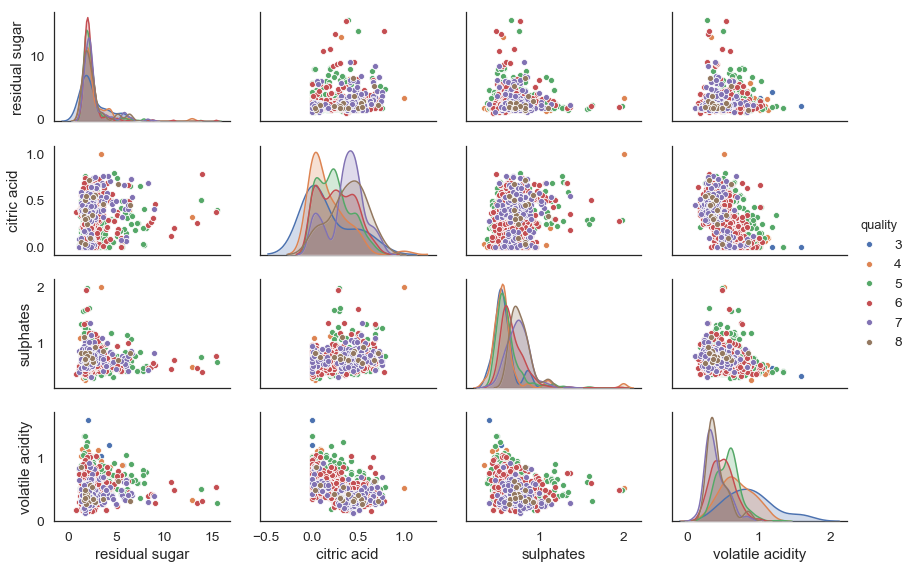

In [112]:
sns.pairplot(data, vars=["residual sugar", "citric acid", "sulphates", "volatile acidity"], hue="quality", height = 2, aspect = 1.5)

##### Note : [you can skip  this If you understand above graphs]
Above plots are looking so messy let's Divid wine as good and bad by giving the limit for the quality

In [113]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [114]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [115]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [116]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

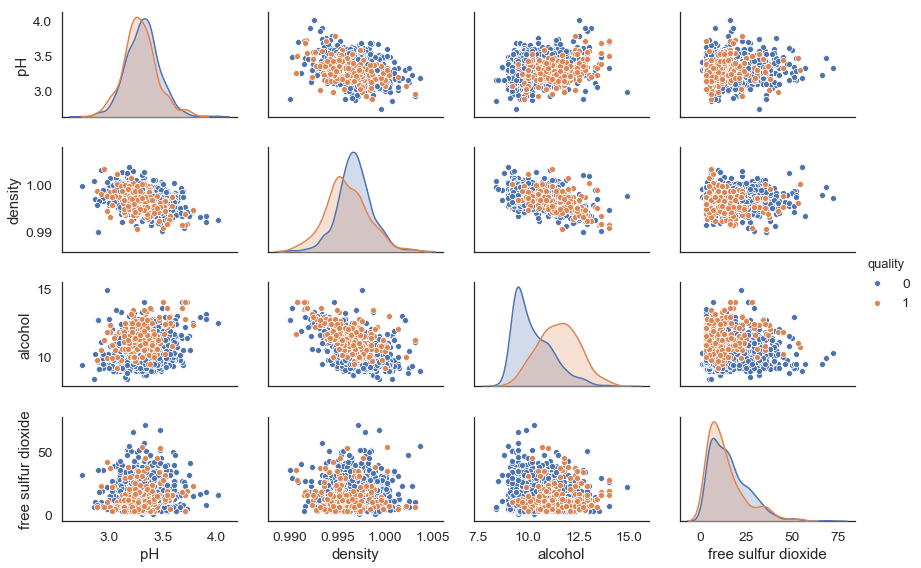

In [117]:
sns.pairplot(data, vars=["pH", "density", "alcohol", "free sulfur dioxide"], hue="quality", size = 2, aspect = 1.5)

### Calculating and plotting heatmap correlation

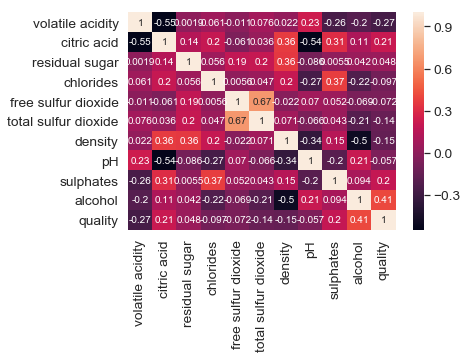

In [118]:
sns.heatmap( data.corr(), annot=True );

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __alcohol and quality is highest i.e. 0.41__ and then between __quality and citric acid i.e. 0.21__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.

## 3. Model and Training
 

__Find the Missing Values__

In [120]:
def handle_missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = round(total / data.shape[0] * 100)
    return pd.concat([total, percentage], axis = 1, keys = ['total', 'percentage'])
handle_missing_values(data)

,total,percentage
quality,0,0.0
alcohol,0,0.0
sulphates,0,0.0
pH,0,0.0
density,0,0.0
total sulfur dioxide,0,0.0
free sulfur dioxide,0,0.0
chlorides,0,0.0
residual sugar,0,0.0
citric acid,0,0.0
